 # **Diabetes Machine Learning Project**

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

## **Accessing the data**

In [ ]:
# import from kaggle
import kagglehub
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")
print("Path to dataset files:", path)

100%|██████████| 6.03M/6.03M [00:00<00:00, 50.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/alexteboul/diabetes-health-indicators-dataset/versions/1


In [ ]:
# get the files into pandas data frames
diabetes_multiclass = pd.read_csv(path + "/diabetes_012_health_indicators_BRFSS2015.csv")
diabetes_binary_unbalanced = pd.read_csv(path + "/diabetes_binary_health_indicators_BRFSS2015.csv")
diabetes_binary_balanced = pd.read_csv(path + "/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

## **Exploratory Data Analysis (EDA)**

In this project, we will try to predict/classify individuals as having diabetes or not. There are mainly 3 datasets that we will work with.

First there is diabetes_multiclass in which individuals are in one of three classes: 0 for no diabetes, 1 for pre-diabetes, and 2 for has diabetes. The classes are unbalanced as most observations are of class 0.

Next, we have diabetes_binary_unbalanced in which individuals are either class 0 for no diabetes or class 1 for has diabetes. The classes are unbalanced as most are of class 0.

Finally, we have diabetes_binary_balanced in which individuals are again either class 0 or 1, but this time, there are an equal number of observations in class 0 as there are class 1.

In [ ]:
diabetes_multiclass.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


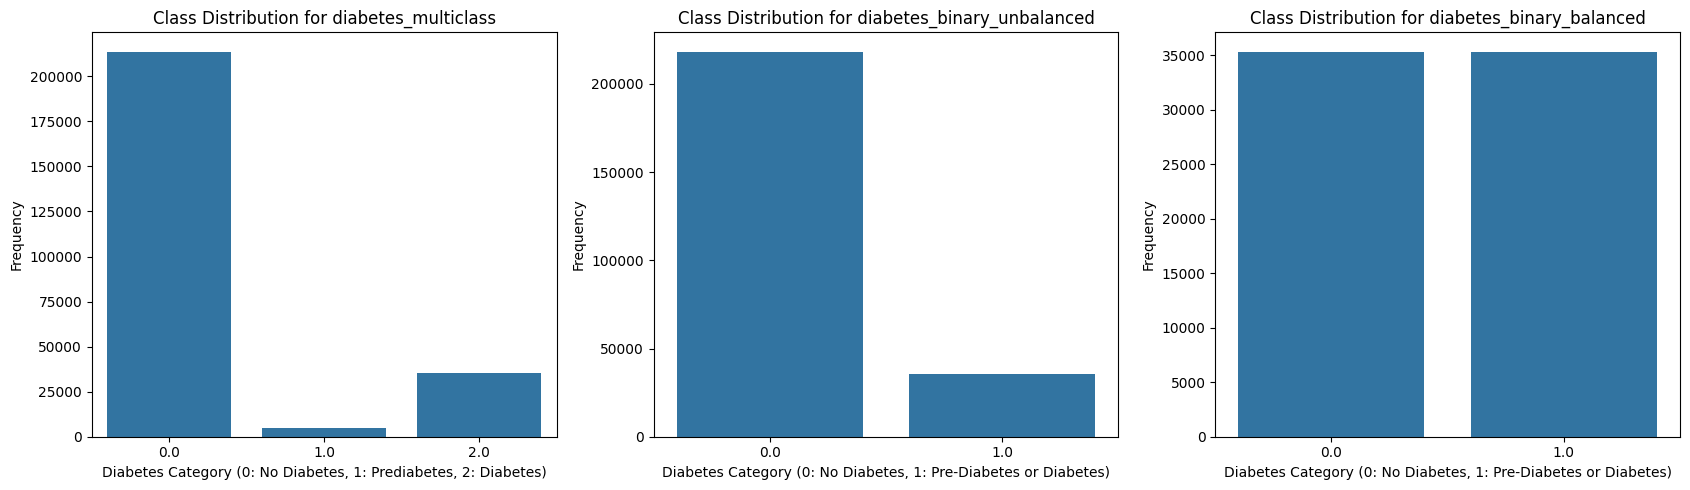

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5))

# Plot 1: multiclass
sns.countplot(data=diabetes_multiclass, x='Diabetes_012', ax=axes[0])
axes[0].set_title("Class Distribution for diabetes_multiclass")
axes[0].set_xlabel("Diabetes Category (0: No Diabetes, 1: Prediabetes, 2: Diabetes)")
axes[0].set_ylabel("Frequency")

# Plot 2: binary unbalanced
sns.countplot(data=diabetes_binary_unbalanced, x='Diabetes_binary', ax=axes[1])
axes[1].set_title("Class Distribution for diabetes_binary_unbalanced")
axes[1].set_xlabel("Diabetes Category (0: No Diabetes, 1: Pre-Diabetes or Diabetes)")
axes[1].set_ylabel("Frequency")

# Plot 3: binary balanced
sns.countplot(data=diabetes_binary_balanced, x='Diabetes_binary', ax=axes[2])
axes[2].set_title("Class Distribution for diabetes_binary_balanced")
axes[2].set_xlabel("Diabetes Category (0: No Diabetes, 1: Pre-Diabetes or Diabetes)")
axes[2].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

**The following variables are categorical:**

Diabetes_binary (0 for no diabetes; 1 for diabetes)
/Diabetes_multiclass (0 for no diabetes; 1 for pre-diabetes; 2 for diabetes)

HighBP (0: no high BP; 1: high BP)

HighChol (0 = no high cholesterol 1 = high cholesterol)

CholCheck (0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years)

Smoker (Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes)

Stroke ((Ever told) you had a stroke. 0 = no 1 = yes)

HeartDiseaseorAttack (coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes)

PhysActivity (physical activity in past 30 days - not including job 0 = no 1 = yes)

Fruits (Consume Fruit 1 or more times per day 0 = no 1 = yes)

Veggies (Consume Vegetables 1 or more times per day 0 = no 1 = yes)

HvyAlcoholConsump ((adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes)

AnyHealthcare (Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes)

NoDocbcCost (Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes)

GenHlth (Would you say that in general your health is: 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor)

MentHlth (days of poor mental health  1-30 days)

PhysHlth (physical illness or injury days in past 30 days scale 1-30)

DiffWalk (Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes)

Sex (0 = female 1 = male)

Age (13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older)

Education (Education level (EDUCA see codebook) scale 1-6 1 = Never attended school)

Income (Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than \$35,000; 8 = \$75,000 or more)

**The following variable is continuous:** BMI (12 to 98)

In [ ]:
diabetes_binary_unbalanced.describe()
#diabetes_binary_unbalanced.info()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


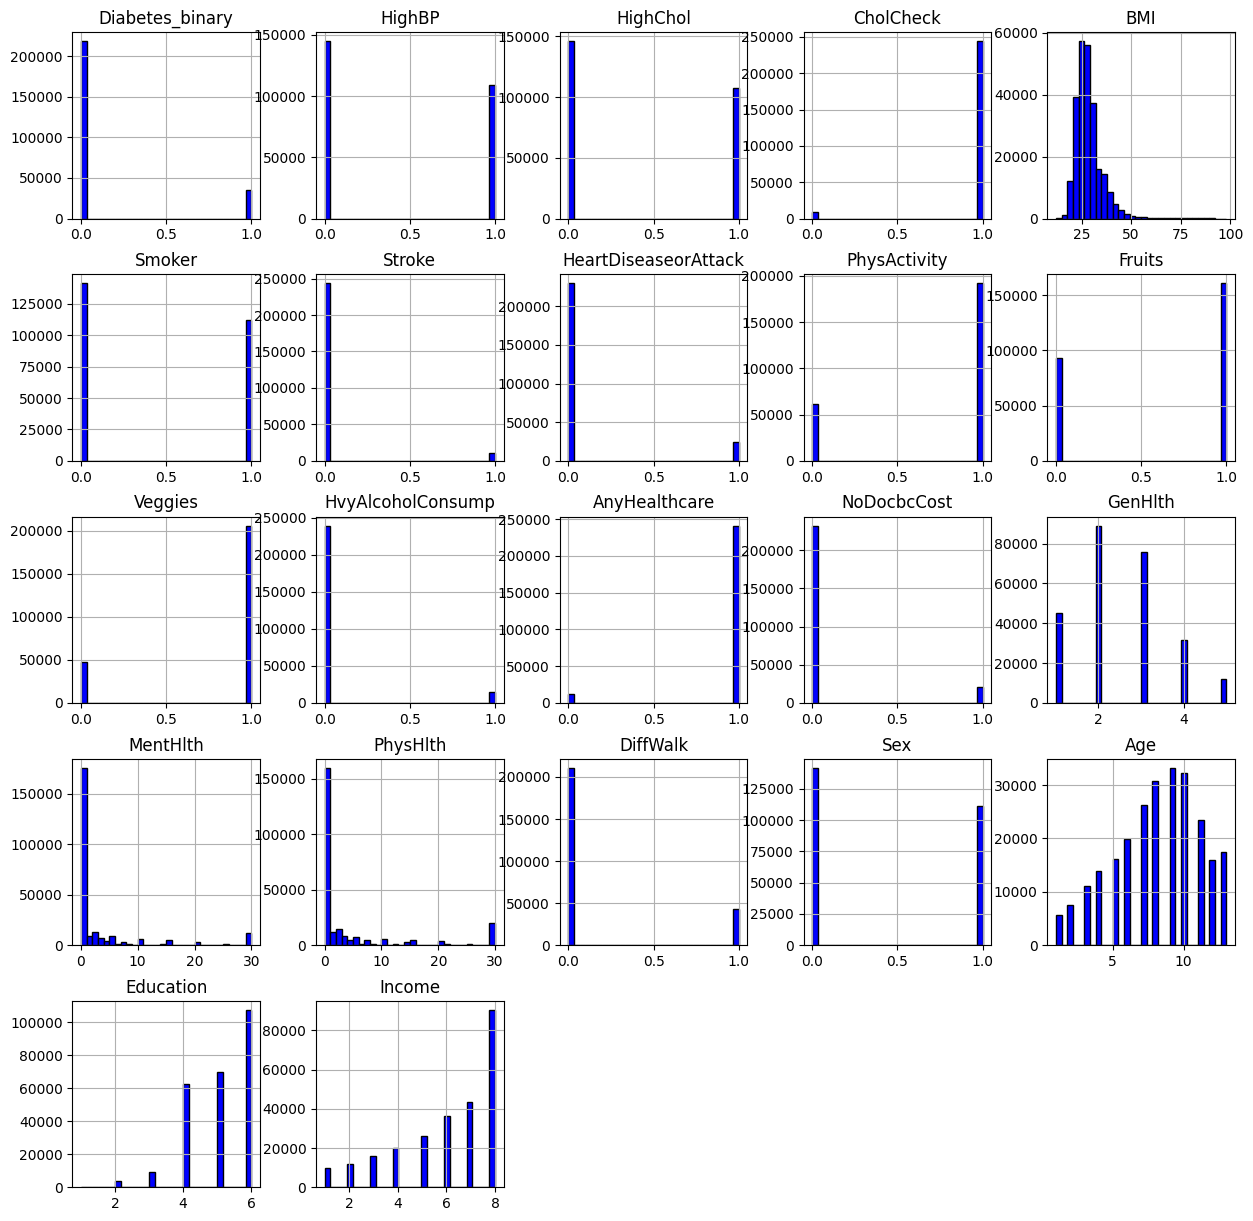

In [ ]:
diabetes_binary_unbalanced.hist(figsize=(15, 15), bins=30, color='blue', edgecolor='black');

### Let's assess multicolinearity, first through correlation matrix and then using Variance Inflation Factor (VIF)

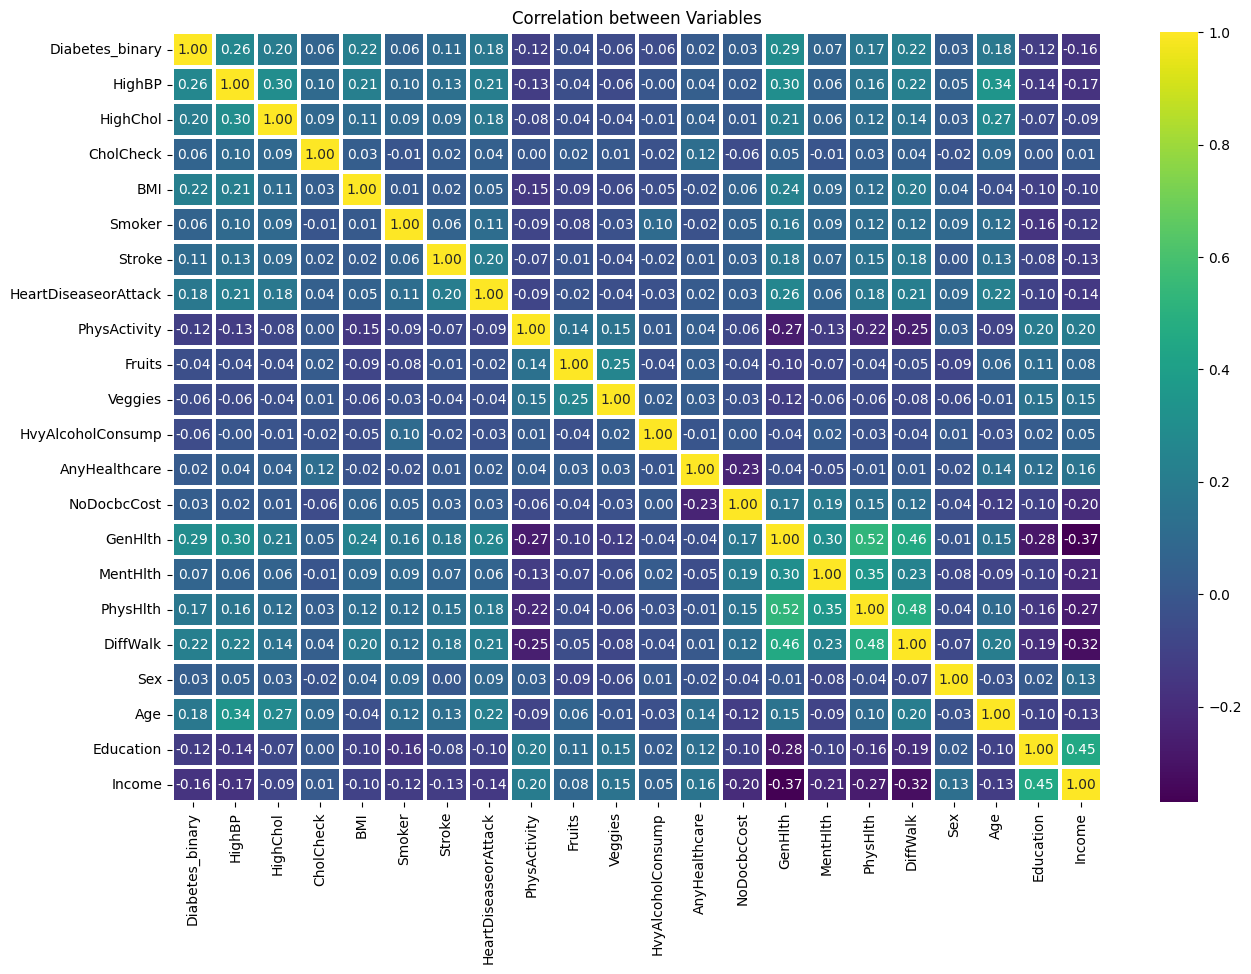

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(diabetes_binary_unbalanced.corr(), annot=True, fmt='.2f', cmap='viridis', linewidths=1.5)
plt.title('Correlation between Variables');

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data

predictors = diabetes_binary_unbalanced.drop(columns=['Diabetes_binary'])  # Drop target variable
vif_results = calculate_vif(predictors)
print(vif_results)

                 Feature        VIF
0                 HighBP   2.299761
1               HighChol   2.029660
2              CholCheck  23.187436
3                    BMI  18.149913
4                 Smoker   1.933042
5                 Stroke   1.126777
6   HeartDiseaseorAttack   1.289820
7           PhysActivity   4.645314
8                 Fruits   3.032775
9                Veggies   5.826886
10     HvyAlcoholConsump   1.083523
11         AnyHealthcare  20.839710
12           NoDocbcCost   1.215834
13               GenHlth  10.740162
14              MentHlth   1.463103
15              PhysHlth   1.999556
16              DiffWalk   1.838551
17                   Sex   1.910708
18                   Age   9.886830
19             Education  29.507416
20                Income  14.156118


Although we have high VIF values for features like CholCheck, the pairwise correlations that we find from the correlation matrix are not very strong. This suggests that the high VIF may be resulting from correlation of many features combined. So, dropping features like CholCheck is not warranted. We will continue our analysis by seeing if regularization techniques handle this multicollinearity well or nullify irrelevant predictors.


### Training and Test Sets

In [ ]:
# Training and test sets
from sklearn.model_selection import train_test_split

''' can use this code later for train test splitting of any of the 3 datasets '''

# # diabetes multiclass
X = diabetes_multiclass.drop('Diabetes_012', axis=1)
y = diabetes_multiclass['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=500)


# # diabetes binary unbalanced
# X = diabetes_binary_unbalanced.drop('Diabetes_binary', axis=1)
# y = diabetes_binary_unbalanced['Diabetes_binary']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=500)

# diabetes binary balanced
#X = diabetes_binary_balanced.drop('Diabetes_binary', axis=1)
#y = diabetes_binary_balanced['Diabetes_binary']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=500)

### EDA: Using K-Means Clustering with PCA

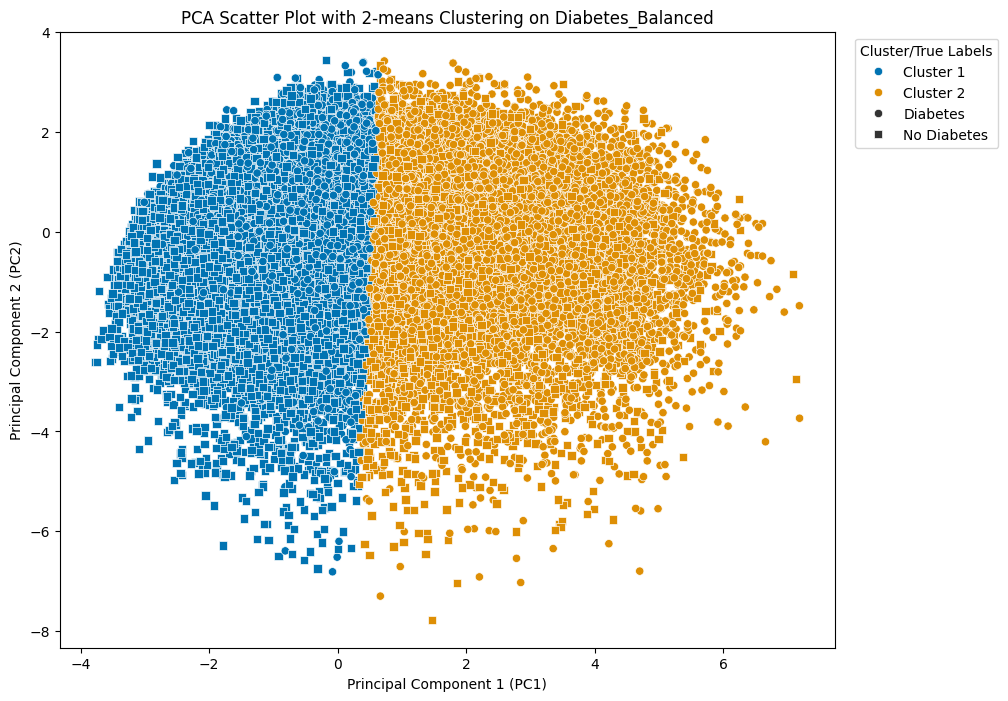

In [ ]:
#this code is the same for the diabetes binary unbalanced or balanced datasets
#note: change the plot's title
#the code for the multiclass dataset is different as it has 3 classes
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #to standardize the data
X_scaled = scaler.fit_transform(X_train)
pca = PCA(n_components=2) #PCA to reduce dimensions to 2
X_pca = pca.fit_transform(X_scaled)

#2-means clustering (2 clusters: diabetes vs. no diabetes)
two_means = KMeans(n_clusters=2, random_state=500) #i set this to 500 to follow the other sections of code
twomeans_labels = two_means.fit_predict(X_pca)
cluster_labels = ["Cluster 1","Cluster 2"]
true_labels = y_train.map({0:"No Diabetes", 1:"Diabetes"})

plt.figure(figsize=(10, 8)) #Scatter plot for PC1 and PC2
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=[cluster_labels[label] for label in twomeans_labels],
    palette="colorblind",
    style=true_labels,
    markers=["o", "s"],
    legend="full"
)
plt.title("PCA Scatter Plot with 2-means Clustering on Diabetes_Balanced") #Change this to Unbalanced for the Unbalanced dataset
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.legend(title="Cluster/True Labels", loc='upper right', bbox_to_anchor=(1.22, 1));

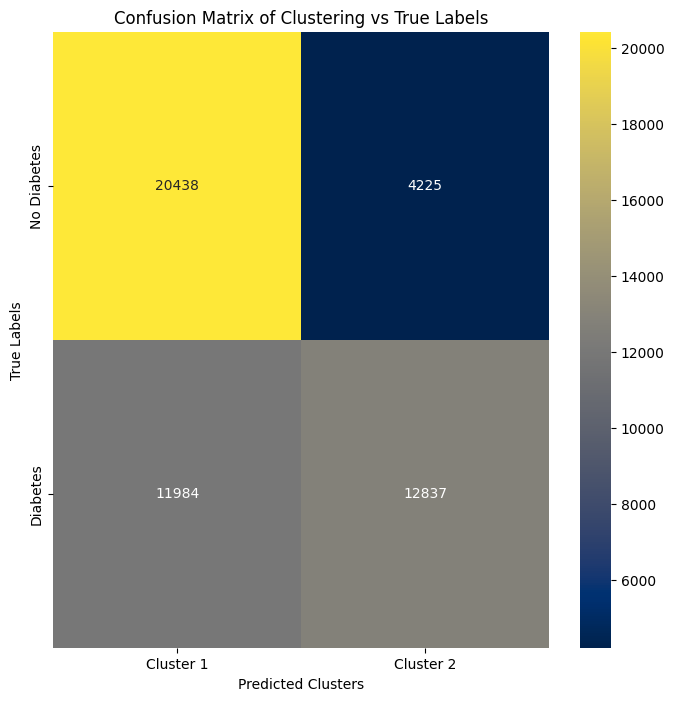

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_train, twomeans_labels) #Confusion matrix

plt.figure(figsize=(8, 8)) #Plot the matrix
sns.heatmap(conf_matrix,annot=True,cmap="cividis",fmt="2d", xticklabels=["Cluster 1","Cluster 2"], yticklabels=["No Diabetes","Diabetes"])
plt.title("Confusion Matrix of Clustering vs True Labels")
plt.xlabel("Predicted Clusters")
plt.ylabel("True Labels");

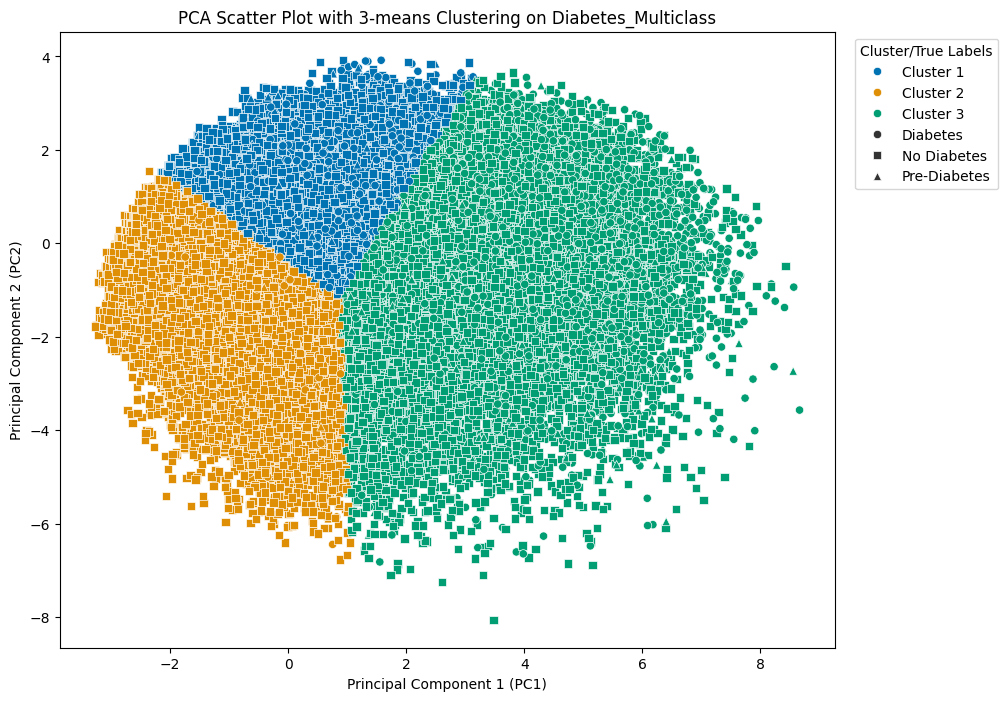

In [ ]:
#This is only for the multiclass dataset and not the other two
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #Standardize the dataset
X_scaled = scaler.fit_transform(X_train)
pca = PCA(n_components=2) #PCA to reduce dimensions to 2
X_pca = pca.fit_transform(X_scaled)

#3-means clustering (multiclass: No Diabetes, Pre-Diabetes, Diabetes)
three_means = KMeans(n_clusters=3, random_state=500)
three_means_labels = three_means.fit_predict(X_pca)
three_cluster_labels = ["Cluster 1", "Cluster 2", "Cluster 3"]
three_true_labels = y_train.map({0: "No Diabetes", 1: "Pre-Diabetes", 2: "Diabetes"})

plt.figure(figsize=(10, 8)) #Scatterplot for the first 2 PCs
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=[three_cluster_labels[label] for label in three_means_labels],
    palette="colorblind",
    style=three_true_labels,
    markers=["o", "s", "^"],
    legend="full"
)
plt.title("PCA Scatter Plot with 3-means Clustering on Diabetes_Multiclass")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.legend(title="Cluster/True Labels", loc='upper right', bbox_to_anchor=(1.22, 1));


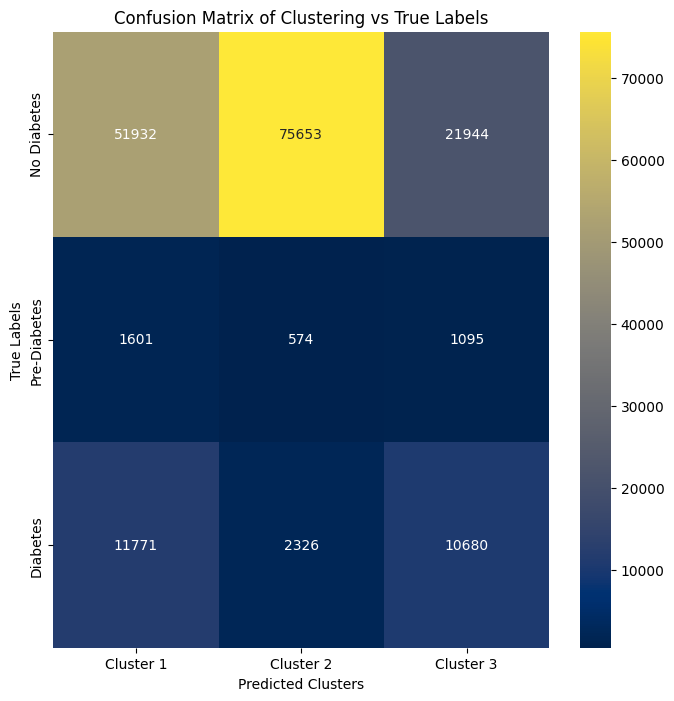

In [ ]:
from sklearn.metrics import confusion_matrix

#this is the confusion matrix for 3-means (multiclass dataset)
conf_matrix = confusion_matrix(y_train, three_means_labels) #Confusion matrix
plt.figure(figsize=(8, 8)) #Plot the matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="cividis", xticklabels=["Cluster 1","Cluster 2","Cluster 3"],
            yticklabels=["No Diabetes","Pre-Diabetes", "Diabetes"])
plt.title("Confusion Matrix of Clustering vs True Labels")
plt.xlabel("Predicted Clusters")
plt.ylabel("True Labels");

On all three datasets, we performed PCA to reduce the number of dimensions to 2 and used k-means clustering. We observed that each cluster did not separate the classes well, which means that PCA wth k-means clustering isn't effective for this particular problem. Since we have the true labels, a supervised learning method, decision trees, or neural networks might be more effective.


### EDA: Logistic Regression on binary unbalanced dataset to explore Feature Associations and Feature Selection

Test Accuracy: 0.8643960895616525
ROC-AUC Score: 0.8235055811832481


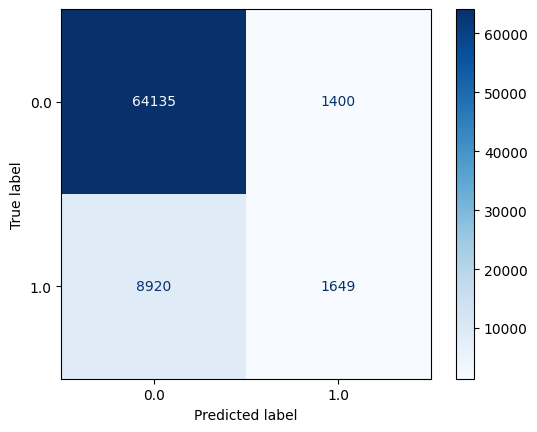

In [ ]:
# Train logistic regression on full dataset (binary unbalanced) and explore predictor p-values
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

X = diabetes_binary_unbalanced.drop('Diabetes_binary', axis=1)
y = diabetes_binary_unbalanced['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=500)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
# print("Classification Report:\n", classification_report(y_test, y_pred))  # if we are interested in metrics like precision and recall

# Calculate ROC-AUC for binary classification
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')

Logistic regression on binary unbalanced data results in pretty good accuracy, but when we take a deeper look, the model has an extremely high false negative rate (8920) / (8920+1649) = 84.4%

This is extremely concerning for medical data, since in our case, we are classifying many patients as not having diabetes when in reality they do. We are missing their diagnosis at an extremely high rate. This is common in datasets which are unbalanced. We predict the majority class well but suffer prediciting the minority class. Our majority class is negative (0: no diabetes). The true negative rate is 97.9%, but for the minority class (1: has diabetes), the true positive rate is 15.6%. In the modeling section of this project, rather than just trying to build a model with high accuracy, we also want to build a model that has a lower false negative rate (or higher true positive rate). We will try to do this by using either a balanced dataset, creating balance throught oversampling, or seeing if other ML methods like Random Forest and XGBoost handle this well.

#### Exploring feature associations with p-values

Lets continue our EDA by evaluating p-values to get a sense of feature importance

In [ ]:
# Analyze p-values

# Add constant for intercept
X_train_const = sm.add_constant(X_train)

model = sm.Logit(y_train, X_train_const)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.513201
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:                49484
Model:                          Logit   Df Residuals:                    49462
Method:                           MLE   Df Model:                           21
Date:                Sun, 24 Nov 2024   Pseudo R-squ.:                  0.2596
Time:                        23:46:57   Log-Likelihood:                -25395.
converged:                       True   LL-Null:                       -34299.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -6.7001      0.147    -45.708      0.000      -6.987      -6.413

Based on the results, variables such as HighBP, HighChol, and BMI are siginficant (with extremely small p-values) and should be considered as we go on building various different predictive models. Surprisingly, variables like Veggies and PhysActivity have relativiely high p-values. These results generally are only in the context of a logistic regression setting where these variables are assumed to have a linear relationship with the log odds of the response. Other ML models that we will use later like Support Vector Machine (SVM) can model non linear relationships.

#### Exploring feature selection through Regularization Techniques (Penalized Logistic Regression)

We will use regularization techniques like ridge and lasso with logistic regression which penalizes large and less predictive coefficients of the features.

In [ ]:
# Use the Ridge penalty (L2) to address multicolinearity

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)

# Perform GridSearchCV for Ridge
ridge_cv = GridSearchCV(ridge_model, param_grid, scoring='roc_auc', cv=5)
ridge_cv.fit(X_train, y_train)

best_ridge_c = ridge_cv.best_params_['C']
print(f"Best C for Ridge: {best_ridge_c}")
print(f"Best CV AUC Score: {ridge_cv.best_score_}")


# Use best C to fit full model and evaluate performance on test set
final_ridge_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, C=best_ridge_c)
final_ridge_model.fit(X_train, y_train)

y_pred_test = final_ridge_model.predict(X_test)
y_pred_prob_test = final_ridge_model.predict_proba(X_test)[:, 1]

test_accuracy = final_ridge_model.score(X_test, y_test)
test_roc_auc = roc_auc_score(y_test, y_pred_prob_test)
# classification_rep = classification_report(y_test, y_pred_test)

print(f"Test Accuracy: {test_accuracy}")
print(f"Test ROC-AUC: {test_roc_auc}")

NameError: name 'LogisticRegression' is not defined

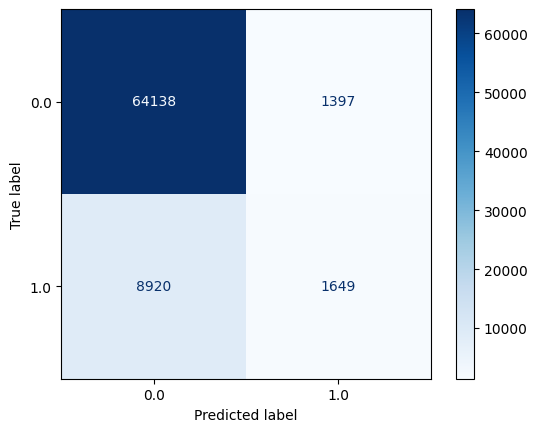

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')

Using ridge penalty for handling multicolinearity resulted in similar performance to the original simple logistic regression. Thus, multicolinearity may not be a big issue as we proceed with our analysis. We will now try the lasso, whose penalty sets some coefficients to zero, thereby performing feature selection.

In [ ]:
# '''Chunk takes 11 min to run'''

# # Use the lasso penalty (L1) to perform feature selection

# param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
# lasso_model = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)

# # Perform GridSearchCV for Lasso
# lasso_cv = GridSearchCV(lasso_model, param_grid, scoring='roc_auc', cv=5)
# lasso_cv.fit(X_train, y_train)

# best_lasso_c = lasso_cv.best_params_['C']
# print(f"Best C for Lasso: {best_lasso_c}")
# print(f"Best CV AUC Score: {lasso_cv.best_score_}")


# # Use best C to fit full model and evaluate performance on test set
# final_lasso_model = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, C=best_lasso_c)
# final_lasso_model.fit(X_train, y_train)

# y_pred_test = final_lasso_model.predict(X_test)
# y_pred_prob_test = final_lasso_model.predict_proba(X_test)[:, 1]

# test_accuracy = final_lasso_model.score(X_test, y_test)
# test_roc_auc = roc_auc_score(y_test, y_pred_prob_test)
# # classification_rep = classification_report(y_test, y_pred_test)

Best C for Lasso: 0.1
Best CV AUC Score: 0.8234762391251019


In [ ]:
print(f"Test Accuracy: {test_accuracy}")
print(f"Test ROC-AUC: {test_roc_auc}")
# print("Classification Report:\n", classification_rep)

# Coefficients for feature selection
lasso_coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": final_lasso_model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print("Lasso Coefficients:\n", lasso_coefficients)

Test Accuracy: 0.7475009430403621
Test ROC-AUC: 0.8268130176854339
Lasso Coefficients:
                  Feature  Coefficient
2              CholCheck     1.195828
0                 HighBP     0.760814
1               HighChol     0.583520
13               GenHlth     0.583342
6   HeartDiseaseorAttack     0.263700
17                   Sex     0.239602
18                   Age     0.144880
5                 Stroke     0.120479
16              DiffWalk     0.100776
11         AnyHealthcare     0.074071
3                    BMI     0.072805
12           NoDocbcCost     0.007250
4                 Smoker     0.000000
14              MentHlth    -0.005256
15              PhysHlth    -0.007421
7           PhysActivity    -0.028942
19             Education    -0.033999
9                Veggies    -0.041598
8                 Fruits    -0.051347
20                Income    -0.061711
10     HvyAlcoholConsump    -0.749617


Only one coefficient was set to zero, Smoker, so we did not achieve much model sparsity. Lasso setting Smoker's coefficient to 0 is consistent with our baseline logistic regression since it had the largest p-value previously.

## **Predictive Modeling with ML**

### **Logistic Regression Models**

#### Logistic Regression for multiclass dataset

Let's see how logistic regression performs when we have 3 classes.

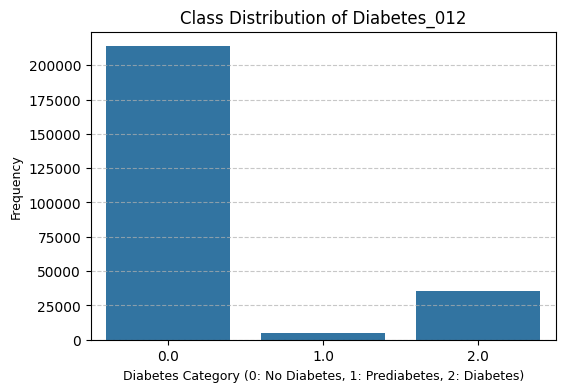

In [ ]:
class_counts = diabetes_multiclass['Diabetes_012'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)

plt.title('Class Distribution of Diabetes_012', fontsize=12)
plt.xlabel('Diabetes Category (0: No Diabetes, 1: Prediabetes, 2: Diabetes)', fontsize=9)
plt.ylabel('Frequency', fontsize=9)
plt.xticks([0, 1, 2])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Again, this multiclass dataset has a class imbalance, so we expect that this model will predict 0 well and won't for 1 and 2.

Test Accuracy: 0.8476164196362872
ROC-AUC Score: 0.782324665359476


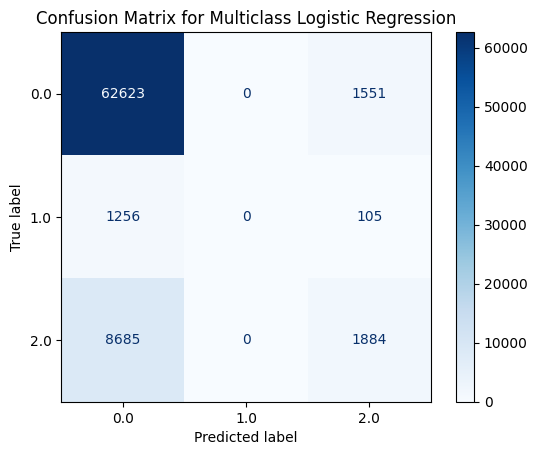

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# diabetes multiclass
X = diabetes_multiclass.drop('Diabetes_012', axis=1)
y = diabetes_multiclass['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=500)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
# print("Classification Report:\n", classification_report(y_test, y_pred))  # if we are interested in metrics like precision and recall

# Calculate ROC-AUC for binary classification
y_pred_prob = model.predict_proba(X_test)  # Probabilities for all classes
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)


# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Multiclass Logistic Regression')
plt.show()

This confirms what we thought, the model has high accuracy since most of the individuals are non-diabetic and are classified as such, but the model fails to perform well for pre-diabetic and diabetic individuals. Logistic regression had similar struggles with the minority class for the unbalanced binary dataset, but now let's try the balanced binary dataset to see if high false negative rate persists.

#### Logistic Regression for binary balanced dataset

Test Accuracy: 0.748491135420596
ROC-AUC Score: 0.826831280990532


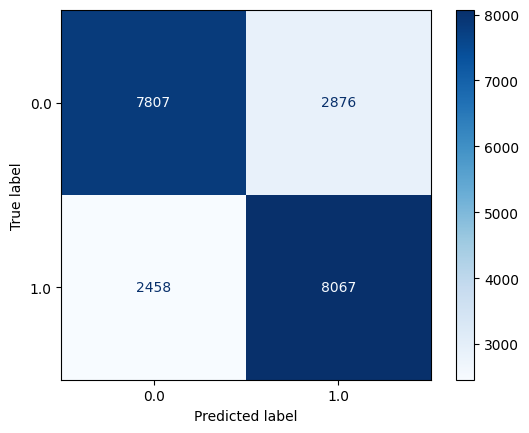

In [ ]:
# Train logistic regression on full dataset (binary balanced) and explore predictor p-values
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

X = diabetes_binary_balanced.drop('Diabetes_binary', axis=1)
y = diabetes_binary_balanced['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=500)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
# print("Classification Report:\n", classification_report(y_test, y_pred))  # if we are interested in metrics like precision and recall

# Calculate ROC-AUC for binary classification
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')

Balancing the dataset resulted in a much better false negative rate, 0.23, as opposed to 0.84 which we got from the binary unbalanced dataset in our EDA section. Even though this accuracy for binary balanced of 75% is lower than the accuracy for binary unbalanced of 86% seen previously, this model is preferable since we have a much lower false negative rate. We are not telling people that they do not have diabetes when they actually do nearly as often if we use this model.

Now we see that logistic regression can be effective in the binary setting when the classes are balanced. In the multiclass setting, we will see if other models like Random Forest or boosting techniques will improve performance on the minority classes. If not, then we can come back to logistic regression and see if balancing the multiclass dataset is effective. The reason we will not balance the multiclass dataset and perform logistic regression immediately is because the class with the least observations is class 1 with 4631 observations, so sampling 4631 from each of class 1 and class 2 (undersampling) will leave us with a much smaller overall number of observations which could potentially be a drawback. We can also try oversampling, particularly Synthetic Minority Oversampling Technique (SMOTE), if using more complex ML methods do not seem to be effective and we deem balancing necessary. SMOTE is generally better than undersampling since we avoid loss of information that results from discarding many observations of the majority class.

### **Random Forest Models**

#### RF with Unbalanced Data

Let's try building a random forest using the multiclass data

Test Accuracy: 0.8418874172185431


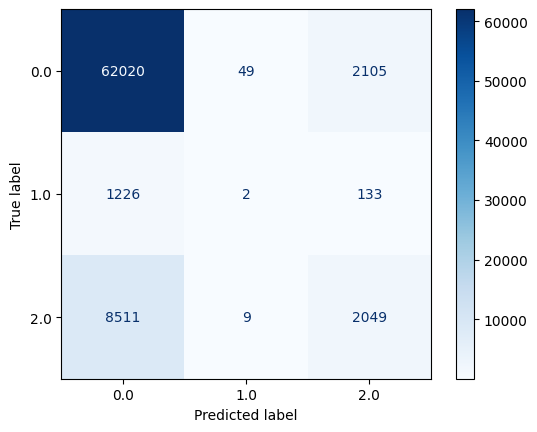

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

X = diabetes_multiclass.drop('Diabetes_012', axis=1)
y = diabetes_multiclass['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=500)

model = RandomForestClassifier(random_state=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate on test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
# print("Classification Report:\n", classification_report(y_test, y_pred))  # if we are interested in metrics like precision and recall

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')

Lets use 3-fold cross validation (CV) for hyperparameter tuning.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=10), param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters: {'max_depth': 10, 'n_estimators': 300}


Test Accuracy: 0.8493377483443708


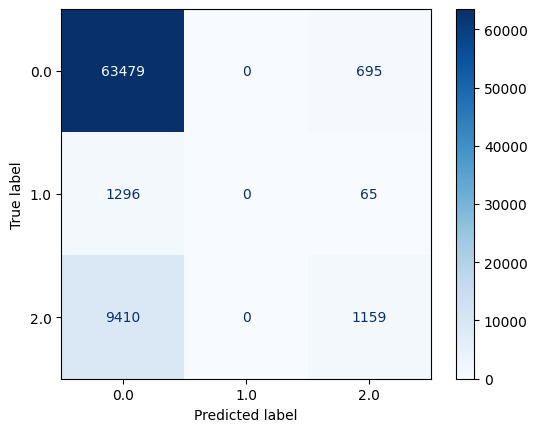

In [ ]:
accuracy = accuracy_score(y_test, y_pred_tuned)
print("Test Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')

It seems the baseline random forest model performed better with the default hyperparamaters. The amount of correctly classified observations in the minority classes is much less, especially class 2 where around 1000 more observations are misclassified in the tuned model. We will try to see if using class weights improves performance on minority classes.

#### RF with class balancing

We will try using class weights first to handle imbalance. Class weights ensure that the minority classes have higher penalty for misclassification, so the model focuses more on correctly predicting those.

Test Accuracy: 0.8392068748029013
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     64174
         1.0       0.01      0.00      0.00      1361
         2.0       0.46      0.16      0.24     10569

    accuracy                           0.84     76104
   macro avg       0.44      0.38      0.38     76104
weighted avg       0.79      0.84      0.80     76104



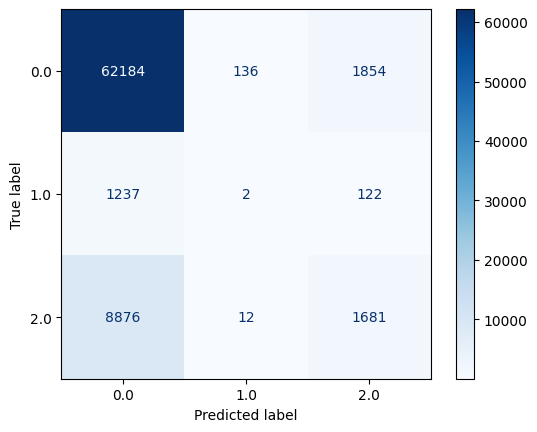

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

X = diabetes_multiclass.drop('Diabetes_012', axis=1)
y = diabetes_multiclass['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=500)

model = RandomForestClassifier(class_weight='balanced', random_state=500, n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate on test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))  # if we are interested in recall, precision, and F1

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')

Even after using class weights, we see that the model still struggles with the minority classes. This is likely because our class imbalance is extremely severe with only 1.8% of our data in class 1, and simply using class weights does not suffice. Thus, we will look to use oversampling, SMOTE, in particular. SMOTE adds synthetic samples to the minority classes to achieve balance by interpolating the nearest neighbors of samples.

Test Accuracy: 0.8381951014401345
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     64174
         1.0       0.02      0.00      0.00      1361
         2.0       0.45      0.22      0.30     10569

    accuracy                           0.84     76104
   macro avg       0.45      0.39      0.40     76104
weighted avg       0.79      0.84      0.81     76104



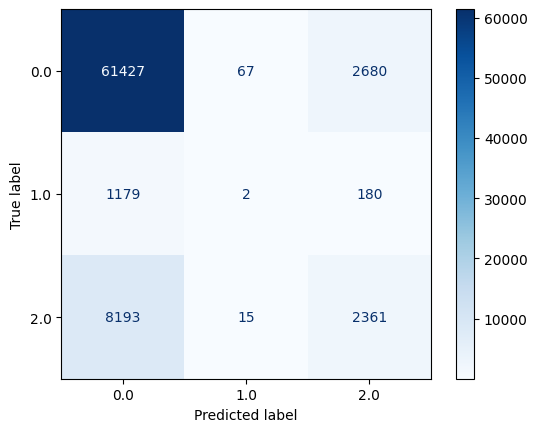

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = diabetes_multiclass.drop('Diabetes_012', axis=1)
y = diabetes_multiclass['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=500)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=500)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Random Forest model on the resampled data and evaluate on test set
model = RandomForestClassifier(random_state=500, n_estimators=100)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')

The model got slightly better at predicting class 2 but still isn't good, and predicting class 1 did not improve.

Maybe the multiclass setting is challenging the model. Let's see if Random Forest performs well in the binary setting when the classes are balanced.

Test Accuracy: 0.7405224443606186
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.70      0.73     10683
         1.0       0.72      0.78      0.75     10525

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



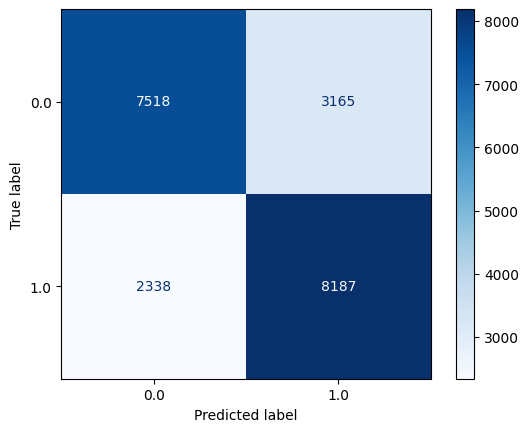

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

X = diabetes_binary_balanced.drop('Diabetes_binary', axis=1)
y = diabetes_binary_balanced['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=500)

model = RandomForestClassifier(random_state=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate on test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))  # if we are interested in metrics like precision and recall

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')

### **Boosting Models**

#### XGBoost

Test Accuracy: 0.850296962051929


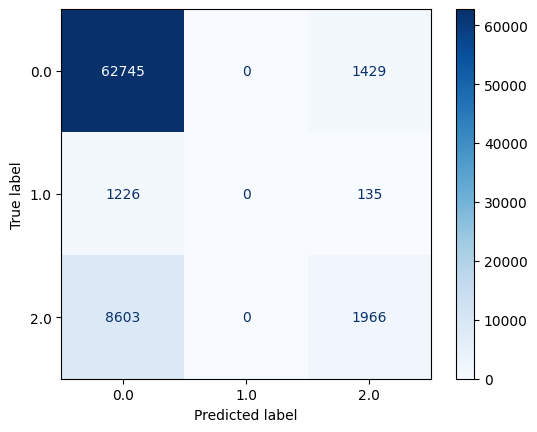

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

X = diabetes_multiclass.drop('Diabetes_012', axis=1)
y = diabetes_multiclass['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=500)

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(y.unique()),
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=500
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Evaluate on test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
# print("Classification Report:\n", classification_report(y_test, y_pred))  # if we are interested in metrics like precision and recall

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')

XGBoost performed similar to our baseline random forest model. We can also try to use SMOTE here to address the class imbalance. We will use the previously resampled training set and run XGBoost.

Test Accuracy: 0.8204036581520026
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.89      0.90     64174
         1.0       0.00      0.00      0.00      1361
         2.0       0.41      0.48      0.44     10569

    accuracy                           0.82     76104
   macro avg       0.44      0.46      0.45     76104
weighted avg       0.82      0.82      0.82     76104



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


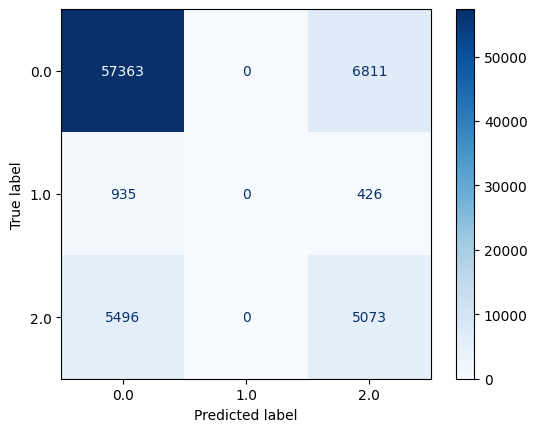

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

X = diabetes_multiclass.drop('Diabetes_012', axis=1)
y = diabetes_multiclass['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=500)

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(y.unique()),
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=500
)

xgb_model.fit(X_train_resampled, y_train_resampled)  # Using same SMOTE resampled training sets from when we did it for Random Forest
y_pred = xgb_model.predict(X_test)

# Evaluate on test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))  # if we are interested in metrics like precision and recall

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')

The performance on predicting class 2 using SMOTE improved from using SMOTE with random forest. Performance on class 1 is still just as poor.

Again, let's see if the binary setting experiences better false negative results than multiclass like how it did with logistic regression and random forest.

Test Accuracy: 0.755281026027914
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.72      0.75     10683
         1.0       0.73      0.79      0.76     10525

    accuracy                           0.76     21208
   macro avg       0.76      0.76      0.76     21208
weighted avg       0.76      0.76      0.75     21208



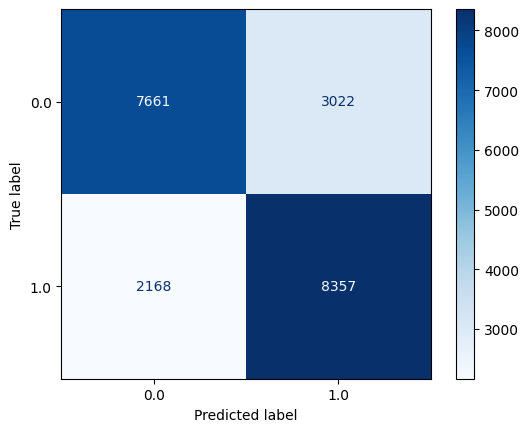

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

X = diabetes_binary_balanced.drop('Diabetes_binary', axis=1)
y = diabetes_binary_balanced['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=500)

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(y.unique()),
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=500
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Evaluate on test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))  # if we are interested in metrics like precision and recall

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')

XGBoost performed better than logistic and random forest in that it has a lower false negative rate. We see that 2168 diabetic individuals are predicted as 0 while 8357 diabetic individuals are correctly classified.

Let's try CatBoost since 20 out of our 21 predictors are categorical.

#### CatBoost

Test Accuracy: 0.8512036161042783


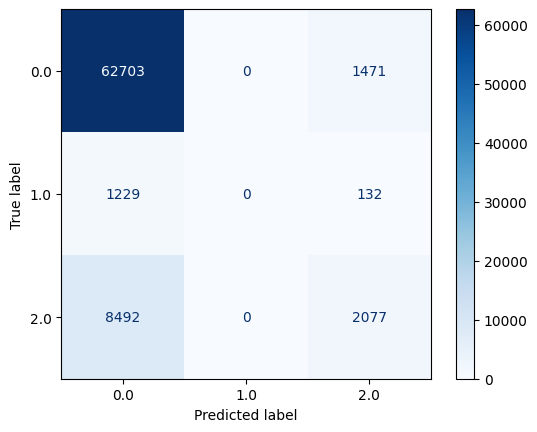

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

X = diabetes_multiclass.drop('Diabetes_012', axis=1)
y = diabetes_multiclass['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=500)

catboost_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    verbose=0,
    random_state=500
)

catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)

# Evaluate on test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
# print("Classification Report:\n", classification_report(y_test, y_pred))  # if we are interested in metrics like precision and recall

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')

CatBoost performed slightly better than XGBoost and Random Forest.

Again, we could try using SMOTE for class imbalance.

Test Accuracy: 0.8406522653211395
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     64174
         1.0       0.00      0.00      0.00      1361
         2.0       0.47      0.34      0.39     10569

    accuracy                           0.84     76104
   macro avg       0.45      0.43      0.43     76104
weighted avg       0.81      0.84      0.82     76104



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


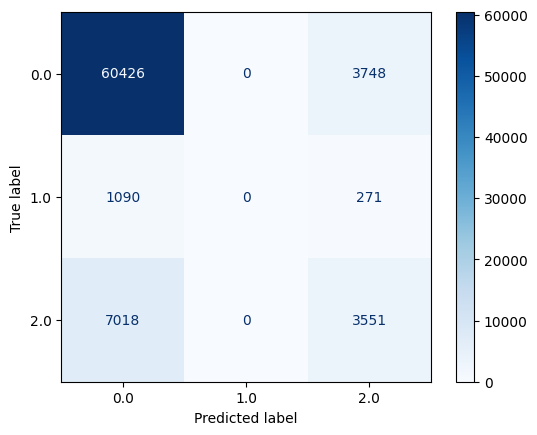

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

X = diabetes_multiclass.drop('Diabetes_012', axis=1)
y = diabetes_multiclass['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=500)

catboost_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    verbose=0,
    random_state=500
)

catboost_model.fit(X_train_resampled, y_train_resampled)  # Using same SMOTE resampled training sets from when we did it for Random Forest
y_pred = catboost_model.predict(X_test)

# Evaluate on test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))  # if we are interested in metrics like precision and recall

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')

After using SMOTE, CatBoost did better than random forest, but not XGBoost for predicting class 2. Class 1 was consistently almost never predicted correctly among the 3 tree-based classifiers.

Again, we will now see if the binary setting also improves performance on predicting 1 when the data is balanced.

Test Accuracy: 0.7559883062995096
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.72      0.75     10683
         1.0       0.73      0.80      0.76     10525

    accuracy                           0.76     21208
   macro avg       0.76      0.76      0.76     21208
weighted avg       0.76      0.76      0.76     21208



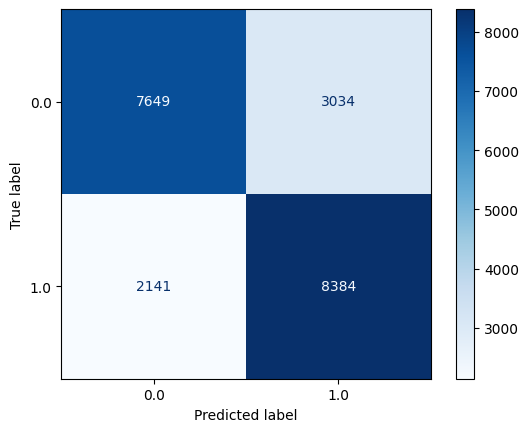

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

X = diabetes_binary_balanced.drop('Diabetes_binary', axis=1)
y = diabetes_binary_balanced['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=500)

catboost_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    verbose=0,
    random_state=500
)

catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)

# Evaluate on test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))  # if we are interested in metrics like precision and recall

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')

In the binary setting, CatBoost and XGBoost performed similar and were better than random forest and logistic regression. We have achieved a much better false negative rate than when the data was unbalanced.

The multiclass setting saw some improvements in predicting class 2, but problems with class 1 still persist even after SMOTE oversampling. This might be because SMOTE uses neighbors for interpolation of new samples which could face challenges from the features being categorical and not continuous.

### **K-Nearest Neighbors**

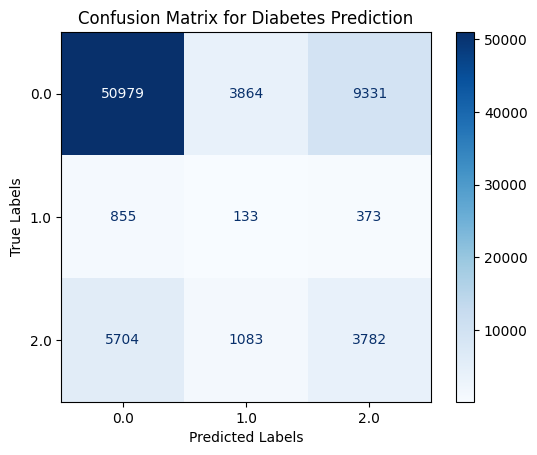

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
X = diabetes_multiclass.drop('Diabetes_012', axis=1)
y = diabetes_multiclass['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=500)
smote = SMOTE(random_state=500)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=2)  # k=3, can be adjusted
knn.fit(X_train_resampled, y_train_resampled)

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Diabetes Prediction')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
X_bin= diabetes_binary_balanced.drop('Diabetes_binary', axis=1)
y_bin = diabetes_binary_balanced['Diabetes_binary']
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.3, random_state=500)

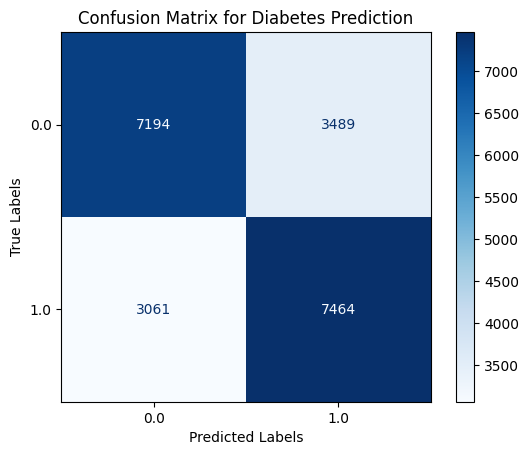

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)  # k=3, can be adjusted
knn.fit(X_train_bin, y_train_bin)

y_pred_bin = knn.predict(X_test_bin)

cm = confusion_matrix(y_test_bin, y_pred_bin)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Diabetes Prediction')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### **Support Vector Machine (SVM)**

Model accuracy: 84.35%


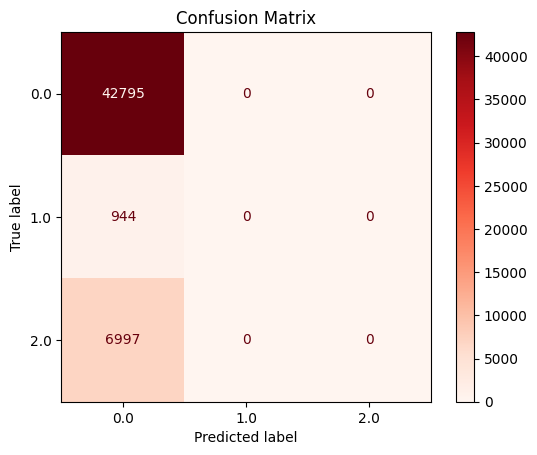

In [ ]:
#Linear
import sklearn as sk
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


X = diabetes_multiclass.drop("Diabetes_012", axis=1)
y = diabetes_multiclass['Diabetes_012']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = svm.SVC(kernel='linear')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
display.plot(cmap='Reds', values_format='d')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#SVM using RBF with SMOTE resampling (Fixed issue of using Smote on the test set)


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

x = data.drop("Diabetes_012", axis=1)
y = data["Diabetes_012"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=50)
x_resampled, y_resampled = smote.fit_resample(X_train, y_train)

sns.countplot(x=y_resampled)
plt.title("Class Distribution after SMOTE")
plt.show()


scaler = StandardScaler()
x_resampled = scaler.fit_transform(x_resampled)
X_test = scaler.transform(X_test)

clf = SVC(kernel='rbf', random_state=42)
clf.fit(x_resampled, y_resampled)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


Model accuracy: 83.60%. For RBF with fixed predicting set


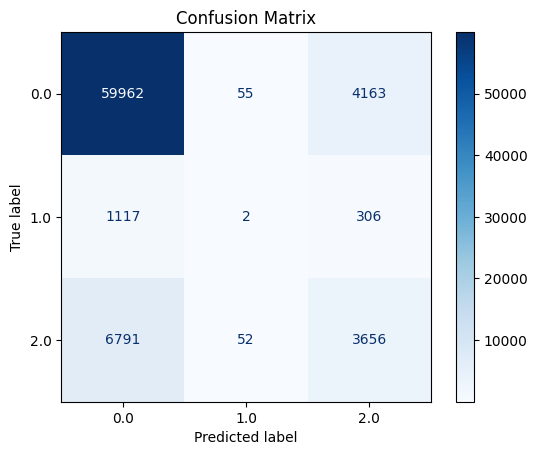


In [ ]:
# Cross Validation
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score

param_grid = {

    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']

}

grid_search = GridSearchCV(SVC(), param_grid, cv=5,scoring='accuracy')
grid_search.fit(x_resampled, y_resampled)

print(f"Best parameters: {grid_search.best_params_}")
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)


y_pred1 = best_model.predict(X_test)


cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Reds', values_format='d')
plt.title("Confusion Matrix")
plt.show()

print("accuracy_score:", accuracy_score(y_test, y_pred1))
print("classification_report:", classification_report(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

NameError: name 'x_resampled' is not defined

Linear SVM with PCA on multiclass

Test Accuracy: 84.70%


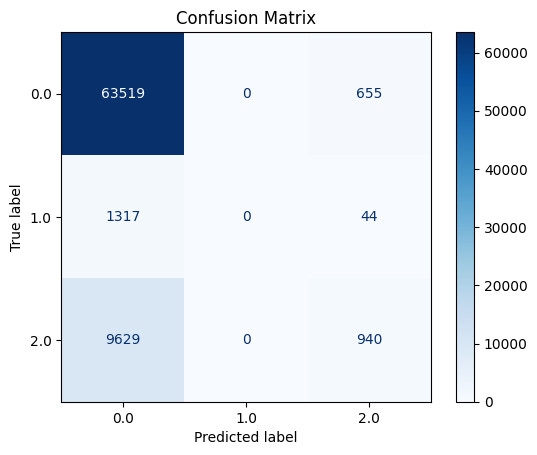

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #to standardize the data
X_scaled = scaler.fit_transform(X_train)
pca = PCA(n_components=2) #PCA to reduce dimensions to 2
X_pca = pca.fit_transform(X_scaled)

from sklearn.svm import LinearSVC
svm_model_linear = LinearSVC(random_state=500)
svm_model_linear.fit(X_scaled, y_train)

X_test_scaled = scaler.fit_transform(X_test)
y_pred = svm_model_linear.predict(X_test_scaled)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
cm = confusion_matrix(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(set(y_test)))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix");

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
# determine if the task is binary/multiclass
if len(set(y_test)) == 2:  #Binary
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
else:  #Multiclass
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.6746
Precision: 0.8451
Recall: 0.6746
F1-Score: 0.7375



Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.69      0.80     64174
         1.0       0.03      0.23      0.05      1361
         2.0       0.35      0.61      0.44     10569

    accuracy                           0.67     76104
   macro avg       0.44      0.51      0.43     76104
weighted avg       0.85      0.67      0.74     76104

Test Accuracy: 67.46%


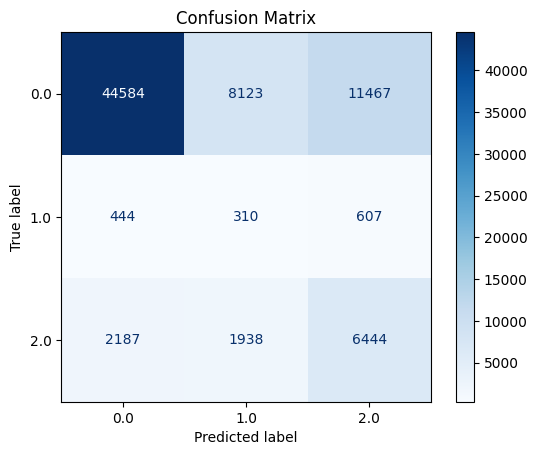

In [ ]:
from imblearn.over_sampling import SMOTE
#from sklearn.svm import LinearSVC
#from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Make sure to scale the training data
X_test_scaled = scaler.transform(X_test)  # Transform the test data using the same scaler
smote = SMOTE(random_state=500) # SMOTE to balance class distribution
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
# Train the LinearSVC model on the resampled data (SMOTE)
svm_model_linear = LinearSVC(random_state=500, max_iter=10000)
svm_model_linear.fit(X_train_resampled, y_train_resampled)

y_pred = svm_model_linear.predict(X_test_scaled) #test set predictions

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(set(y_test)))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix");

### **Deep Neural Networks (DNN) with SMOTE**

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14019/14019 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.5131 - loss: 0.9832 - val_accuracy: 0.6324 - val_loss: 0.8462
Epoch 2/30
14019/14019 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.5558 - loss: 0.9172 - val_accuracy: 0.6326 - val_loss: 0.8272
Epoch 3/30
14019/14019 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.5658 - loss: 0.9062 - val_accuracy: 0.6447 - val_loss: 0.8008
Epoch 4/30
14019/14019 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.5715 - loss: 0.8987 - val_accuracy: 0.6211 - val_loss: 0.8423
Epoch 5/30
14019/14019 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.5782 - loss: 0.8904 - val_accuracy: 0.6478 - val_loss: 0.8074
Epoch 6/30
14019/14019 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.5800 - loss: 0.8889 - val_accuracy: 0.6483 - val_loss: 0.8022
Epoch 7/30
14019/14019 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - accuracy: 0.5864 - loss: 0.8828 - val_accuracy: 0.6251 - val_loss: 0.8305
Epoch 8/30
14019/14019 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.5864 - lo

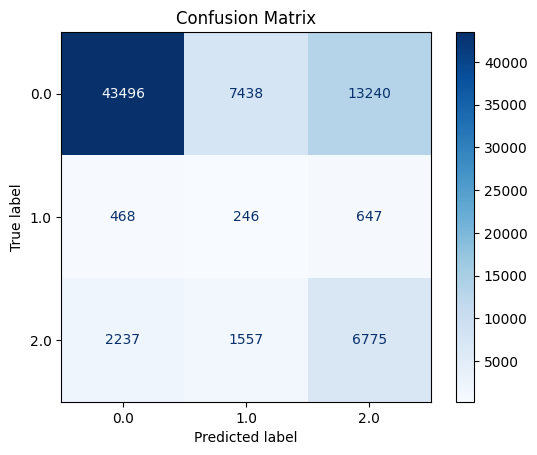

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

scaler = StandardScaler() #Standardize the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#The following SMOTE is for the binary datasets:
#smote = SMOTE(sampling_strategy=1.0, random_state=500, k_neighbors=3)
#X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

#The following SMOTE is for the multiclass dataset:
smote = SMOTE(sampling_strategy='auto', random_state=500, k_neighbors=3)  #auto-balances the classes
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

num_classes = len(set(y_resampled)) # Convert labels to categorical
y_resampled_categorical = tf.keras.utils.to_categorical(y_resampled, num_classes=num_classes)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

model = Sequential([
    Dense(64, activation='relu', input_dim=X_resampled.shape[1]),
    #64: no. of neurons in the layer
    BatchNormalization(), #Normalizes outputs of the previous layer (improves training speed & stability)
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
    #Output layer for multi-class classification (which is also used for binary)
])

model.compile(optimizer=Adam(learning_rate=0.001),
              #i think this learning rate is good; smaller ones don't work
              #as well
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_resampled, y_resampled_categorical,
                    validation_data=(X_test_scaled, y_test_categorical),
                    epochs=30, #iterations over entire dataset
                    batch_size=32,
                    verbose=1)

y_pred_prob = model.predict(X_test_scaled)
y_pred = y_pred_prob.argmax(axis=1)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=sorted(set(y_test)))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

The Deep Neural Network (DNN) involves a feedforward neural network with multiple dense layers, including hidden layers with ReLU (Rectified Linear Unit) activation and a softmax output layer for multiclass classification (including binary). SMOTE is used as an oversampling technique to help deal with the imbalanced classes (especially the prediabetes class for the multiclass dataset).

The model performs best for classifying class 0 (no diabetes), and does fine for class 2 (diabetes).
However, even with SMOTE, the model doesn't work well for prediabetes when using the multiclass dataset.